In [94]:
# 기본 import

from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [95]:
# 데이터 불러오기 (csv, xlsx)

df = pd.read_csv("C:/ai/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


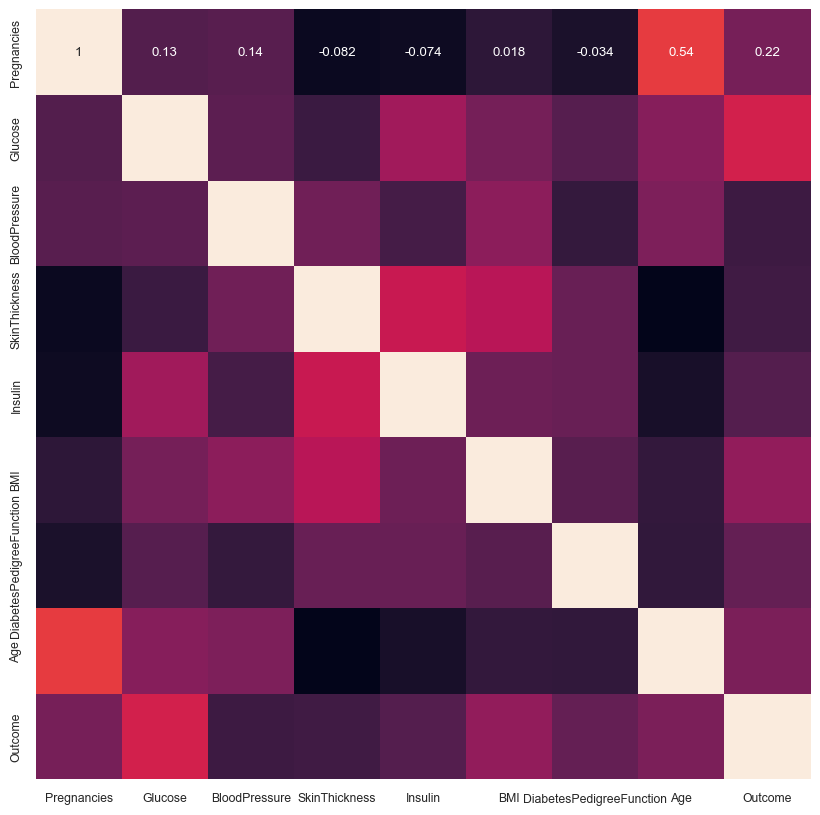

In [96]:
# 결측치 직관확인

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [97]:
# 데이터 분류

X=df.drop('Outcome',axis=1)
y=df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)
print(X.head())
print(y.value_counts())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
Outcome
0    500
1    268
Name: count, dtype: int64


In [98]:
# classification 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [99]:
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.7708333333333334
[[119  11]
 [ 33  29]]


In [100]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.7916666666666666
[[115  15]
 [ 25  37]]


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [101]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

pred = rf_clf.predict(X_test)

print ("\n--- Radom Forest ---")
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.7708333333333334
[[116  14]
 [ 30  32]]


In [102]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.71875
[[102  28]
 [ 26  36]]


In [103]:
clf_dt = KNeighborsClassifier(n_neighbors=3)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- KNN Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- KNN Classifier ---
0.6979166666666666
[[100  30]
 [ 28  34]]


In [147]:
# 데이터 불러오기 (csv, xlsx)

df = pd.read_csv("C:/ai/diabetes.csv")
df["Outcome"]=LabelEncoder().fit_transform(df["Outcome"]) ### 회귀 위한 데이터 숫자화

# 데이터 분류
X=df.drop('Outcome',axis=1)
y = pd.get_dummies(df['Outcome']).values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)
print(X)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [154]:
# 딥러닝 모델

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(20,input_shape=(X_train.shape[1],),activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))
#model.add(Dense(y_train.shape[1],activation='softmax'))
model.add(Dense(y_train.shape[1],activation='sigmoid'))

model.compile(Adam(learning_rate=0.1),'binary_crossentropy',metrics=['accuracy'])
#model.compile(Adam(learning_rate=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_148 (Dense)               │ (None, 20)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_149 (Dense)               │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_150 (Dense)               │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 2)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 457 (1.79 KB)

 Trainable params: 457 (1.79 KB)

 Non-trainable params: 0 (0.00 B)

In [155]:
# 딥러닝 훈련

model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=4,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5765 - loss: 1.9644 - val_accuracy: 0.6771 - val_loss: 0.6291
Epoch 2/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6353 - loss: 0.6624 - val_accuracy: 0.6771 - val_loss: 0.6359
Epoch 3/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6101 - loss: 0.6717 - val_accuracy: 0.6771 - val_loss: 0.6299
Epoch 4/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6422 - loss: 0.6561 - val_accuracy: 0.6771 - val_loss: 0.6349
Epoch 5/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7016 - loss: 0.6084 - val_accuracy: 0.6771 - val_loss: 0.6519
Epoch 6/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6356 - loss: 0.6600 - val_accuracy: 0.6771 - val_loss: 0.6321
Epoch 7/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6414 - loss: 0.6572 - val_accuracy: 0.6771 - val_loss: 0.6348
Epoch 8/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6249 - loss: 0.6659 - val_accuracy: 0.

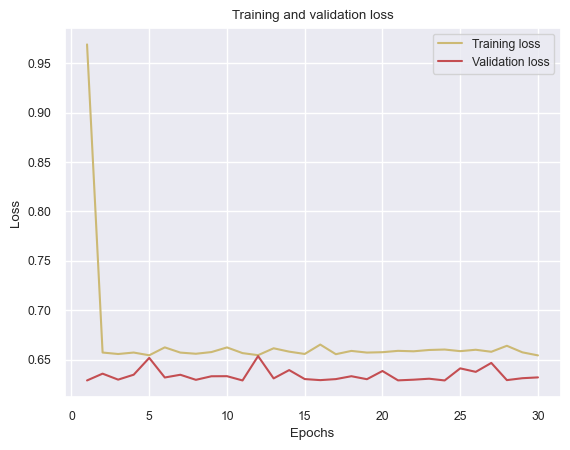

In [156]:
# 딥러닝 결과

import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [157]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81       130
           1       0.00      0.00      0.00        62

    accuracy                           0.68       192
   macro avg       0.34      0.50      0.40       192
weighted avg       0.46      0.68      0.55       192

[[130   0]
 [ 62   0]]


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [158]:
# 데이터 불러오기 (csv, xlsx)

df = pd.read_csv("C:/ai/diabetes.csv")
df.drop('Outcome', axis=1, inplace=True)

# 데이터 분류
X=df.drop('BMI',axis=1)
y = pd.get_dummies(df['BMI']).values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)
print(X)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0              6      148             72             35        0   
1              1       85             66             29        0   
2              8      183             64              0        0   
3              1       89             66             23       94   
4              0      137             40             35      168   
..           ...      ...            ...            ...      ...   
763           10      101             76             48      180   
764            2      122             70             27        0   
765            5      121             72             23      112   
766            1      126             60              0        0   
767            1       93             70             31        0   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21 

In [159]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

input_layer=Input(shape=(X_train.shape[1],))
layer1=Dense(8, activation="relu")(input_layer)
layer2=Dense(20, activation="relu")(layer1)
layer3=Dense(10, activation="relu")(layer2)
out_layer=Dense(1)(layer3)
model=Model(inputs=input_layer,outputs=out_layer)
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "functional_89"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_36 (InputLayer)     │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 20)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_155 (Dense)               │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 465 (1.82 KB)

 Trainable params: 465 (1.82 KB)

 Non-trainable params: 0 (0.00 B)

In [160]:
n_epoch=32
n_size=32
history=model.fit(X_train,y_train, epochs=n_epoch, batch_size=32,validation_data= (X_test,y_test))

Epoch 1/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 40.1676 - mse: 40.1676 - val_loss: 7.3075 - val_mse: 7.3075
Epoch 2/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.4979 - mse: 5.4979 - val_loss: 1.5856 - val_mse: 1.5856
Epoch 3/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6007 - mse: 1.6007 - val_loss: 1.0358 - val_mse: 1.0358
Epoch 4/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9654 - mse: 0.9654 - val_loss: 0.8217 - val_mse: 0.8217
Epoch 5/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9232 - mse: 0.9232 - val_loss: 0.3872 - val_mse: 0.3872
Epoch 6/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5913 - mse: 0.5913 - val_loss: 0.2987 - val_mse: 0.2987
Epoch 7/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4416 - mse: 0.4416 - val_loss: 0.2064 - val_mse: 0.2064
Epoch 8/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3619 - mse: 0.3619 - val_loss: 0.1617 - val_mse: 0.1617
Epoch 9/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2298 - ms

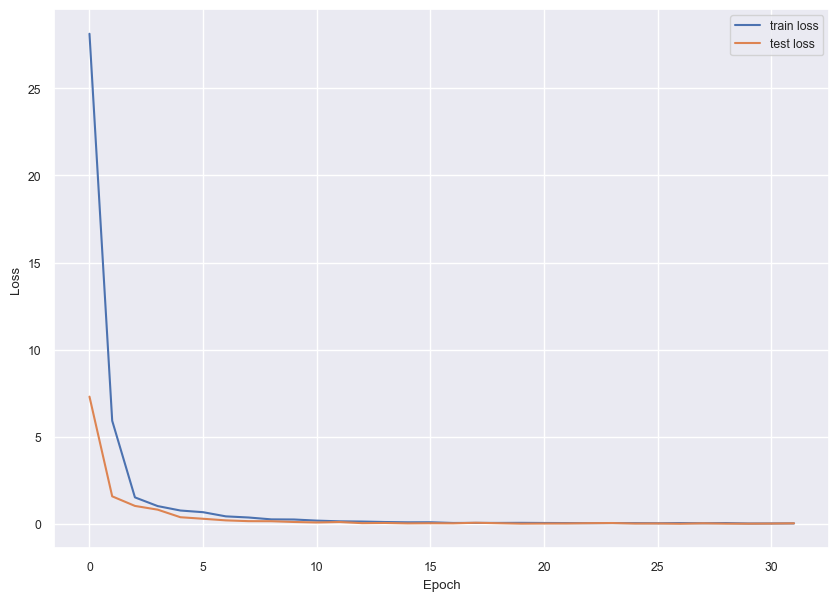

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0237 - mse: 0.0237 
test accuracy:  0.037630535662174225


In [161]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(n_epoch), history.history['loss'], label='train loss')
plt.plot(range(n_epoch), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
test_loss, test_acc = model.evaluate(X_test,y_test)
print("test accuracy: ", test_acc)